# ExtraaLearn Project



## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert




## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
# Importing the basic libraries for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the data
path="/content/drive/MyDrive/DSML MIT Course/Colab_Notebooks/Classification and Hypothesis Testing/Project/ExtraaLearn.csv"

data=pd.read_csv(path)

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking the first five rows
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [5]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

There are 4612 rows and 15 columns.  All have the same number of non-nulls so there are no missing values.  We have the "ID" column, which we will remove for our data analysis, "status" which is our target variable (and is really a categorical variable with 0s and 1s rather than a true numeric variable).  Our only true numeric variables are "age", "website_visits", "time_spent_on_website", and "page_views_per_visit".  The rest are categorical variables, all of which only have two or three categories.

**Dropping the unique values column**

In [6]:
# Dropping the ID column
data.drop(columns='ID',inplace=True)

# Exploratory Data Analysis (EDA)

## Univariate Analysis

**Let's check the statistical summary of the data.**

In [ ]:
# Checking the statistical summary of the numeric variables
data.describe()
# Ignoring "status" here as it's really a categorical variable

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


* Age ranges from 18 to 63 and appears to be left skewed with a mean of 46, median of 51, and IQR between 36 and 57.
* Website visits, time spent on website and page views per visit all have 0 as a minimum value, which means that at least some are interacting through mobile app, phone, and email rather than the website.  I want to explore this further to see how common that is.
* Website visits, time spent on website and page views are also all very right skewed, with website visits and page views per visit especially having clear outliers to the right; the 3rd quartile of website visits is 5 but the max is 30, and the 3rd quartile for page views per visit is 3.75 with a max of 18.4.  Time spent on website has a mean of 724 but a median of 376 and 3rd quartile of 1336, suggesting that there are quite a few people spending a lot of time on the website.  Let's examine this visually.

<Figure size 1200x600 with 0 Axes>

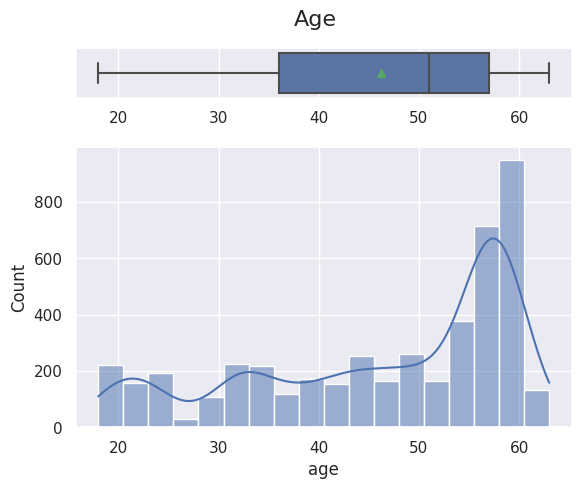

<Figure size 1200x600 with 0 Axes>

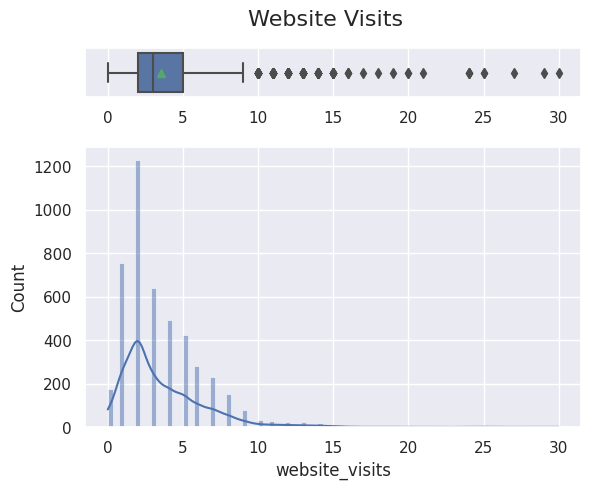

<Figure size 1200x600 with 0 Axes>

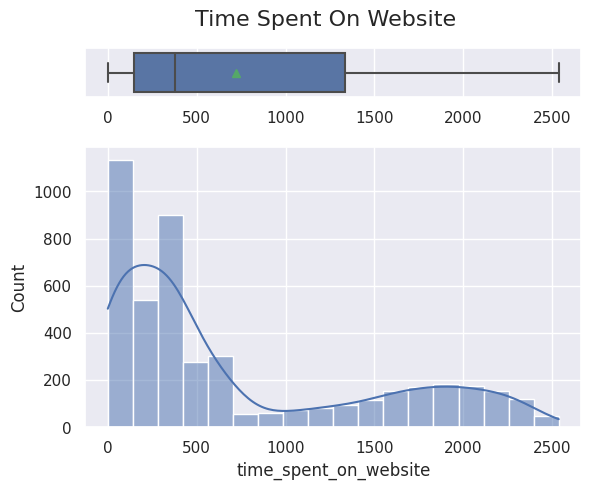

<Figure size 1200x600 with 0 Axes>

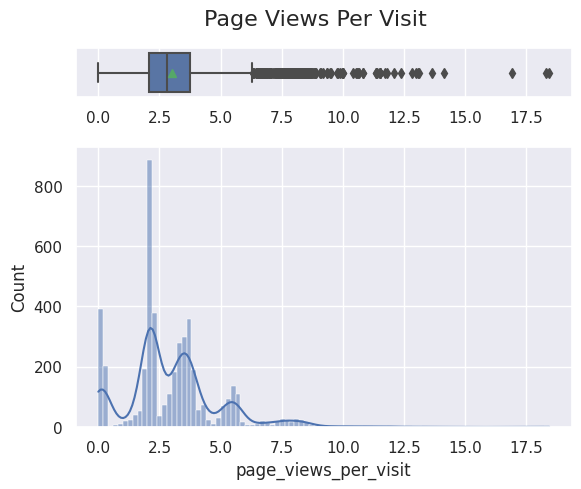

In [ ]:
# Defining a histbox function to examine the numeric data visually

# Defining the hist_box() function
def hist_box(data, col):
    plt.figure(figsize=(12, 6))  # Create a new figure for each plot
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=False, gridspec_kw={'height_ratios': (0.15, 0.85)})

    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    ax_box.set_xlabel('')  # Remove x-axis label for boxplot

    # Formatting column name for title
    formatted_col_name = ' '.join(word.capitalize() for word in col.split('_'))
    f.suptitle(formatted_col_name, fontsize=16)

    # Adjust the top spacing of the subplot and show the plot
    plt.subplots_adjust(top=0.9, hspace=0.3)  # Adjust vertical space between plots
    plt.show()

# Assuming 'data' is your DataFrame
numeric_columns = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]

# Check if these columns exist in the DataFrame and then plot
for col in numeric_columns:
    if col in data.columns:
        hist_box(data, col)
    else:
        print(f"Column '{col}' not found in DataFrame.")

* Age is not distributed the way I expected it.  It is highly left-tailed, and in fact almost looks like a continuous variable for most of the age range, except that there is a massive bulge in the mid- to late-50s, suggesting that potential leads are found at all age ranges but an especially high number are older but not quite retirement age, suggesting that many older workers especially may be looking to reskill.  It will be interesting to see how age factors in to how likely leads are to convert.

* As expected, website visits, page views per visit, and time spent on website are all highly right skewed, with most observations being on the small side.  Most website visits are between 1 and 3, with very few actually being 0 (suggesting most leads are using the website to some extent) but with quite a few exceptional outliers to the right.  

* Time spent on website almost looks tri-modal, with one set having fewer than 100 (I assume seconds?), another bulge between 300 and 400, and another (much smaller) clustered around 2000.  There are no real outliers here, but an interesting spread to the distribution.  Page views per visit tend to cluster in a few different modes toward the side of few visits, with the largest mode being a bit smaller than 2.5.

**Let's examine the categorical variables**

In [ ]:
# Making a list of all categorical variables
cat_col=["current_occupation", "first_interaction", "profile_completed",
         "last_activity", "print_media_type1", "print_media_type2",
         "digital_media", "educational_channels", "referral", "status"]

# Looking at the counts and percentages of values within each column
for column in cat_col:
    # Create a DataFrame with counts
    counts = data[column].value_counts().rename('counts')

    # Create a DataFrame with percentages, formatted to one decimal point
    percentages = (data[column].value_counts(normalize=True) * 100).rename('percentages').map('{:,.1f}%'.format)

    # Combine the counts and percentages
    summary_df = pd.DataFrame({'Counts': counts, 'Percentages': percentages})

    print(f"Column: {column}")
    print(summary_df)
    print('-'*50)

Column: current_occupation
              Counts Percentages
Professional    2616       56.7%
Unemployed      1441       31.2%
Student          555       12.0%
--------------------------------------------------
Column: first_interaction
            Counts Percentages
Website       2542       55.1%
Mobile App    2070       44.9%
--------------------------------------------------
Column: profile_completed
        Counts Percentages
High      2264       49.1%
Medium    2241       48.6%
Low        107        2.3%
--------------------------------------------------
Column: last_activity
                  Counts Percentages
Email Activity      2278       49.4%
Phone Activity      1234       26.8%
Website Activity    1100       23.9%
--------------------------------------------------
Column: print_media_type1
     Counts Percentages
No     4115       89.2%
Yes     497       10.8%
--------------------------------------------------
Column: print_media_type2
     Counts Percentages
No     4379    

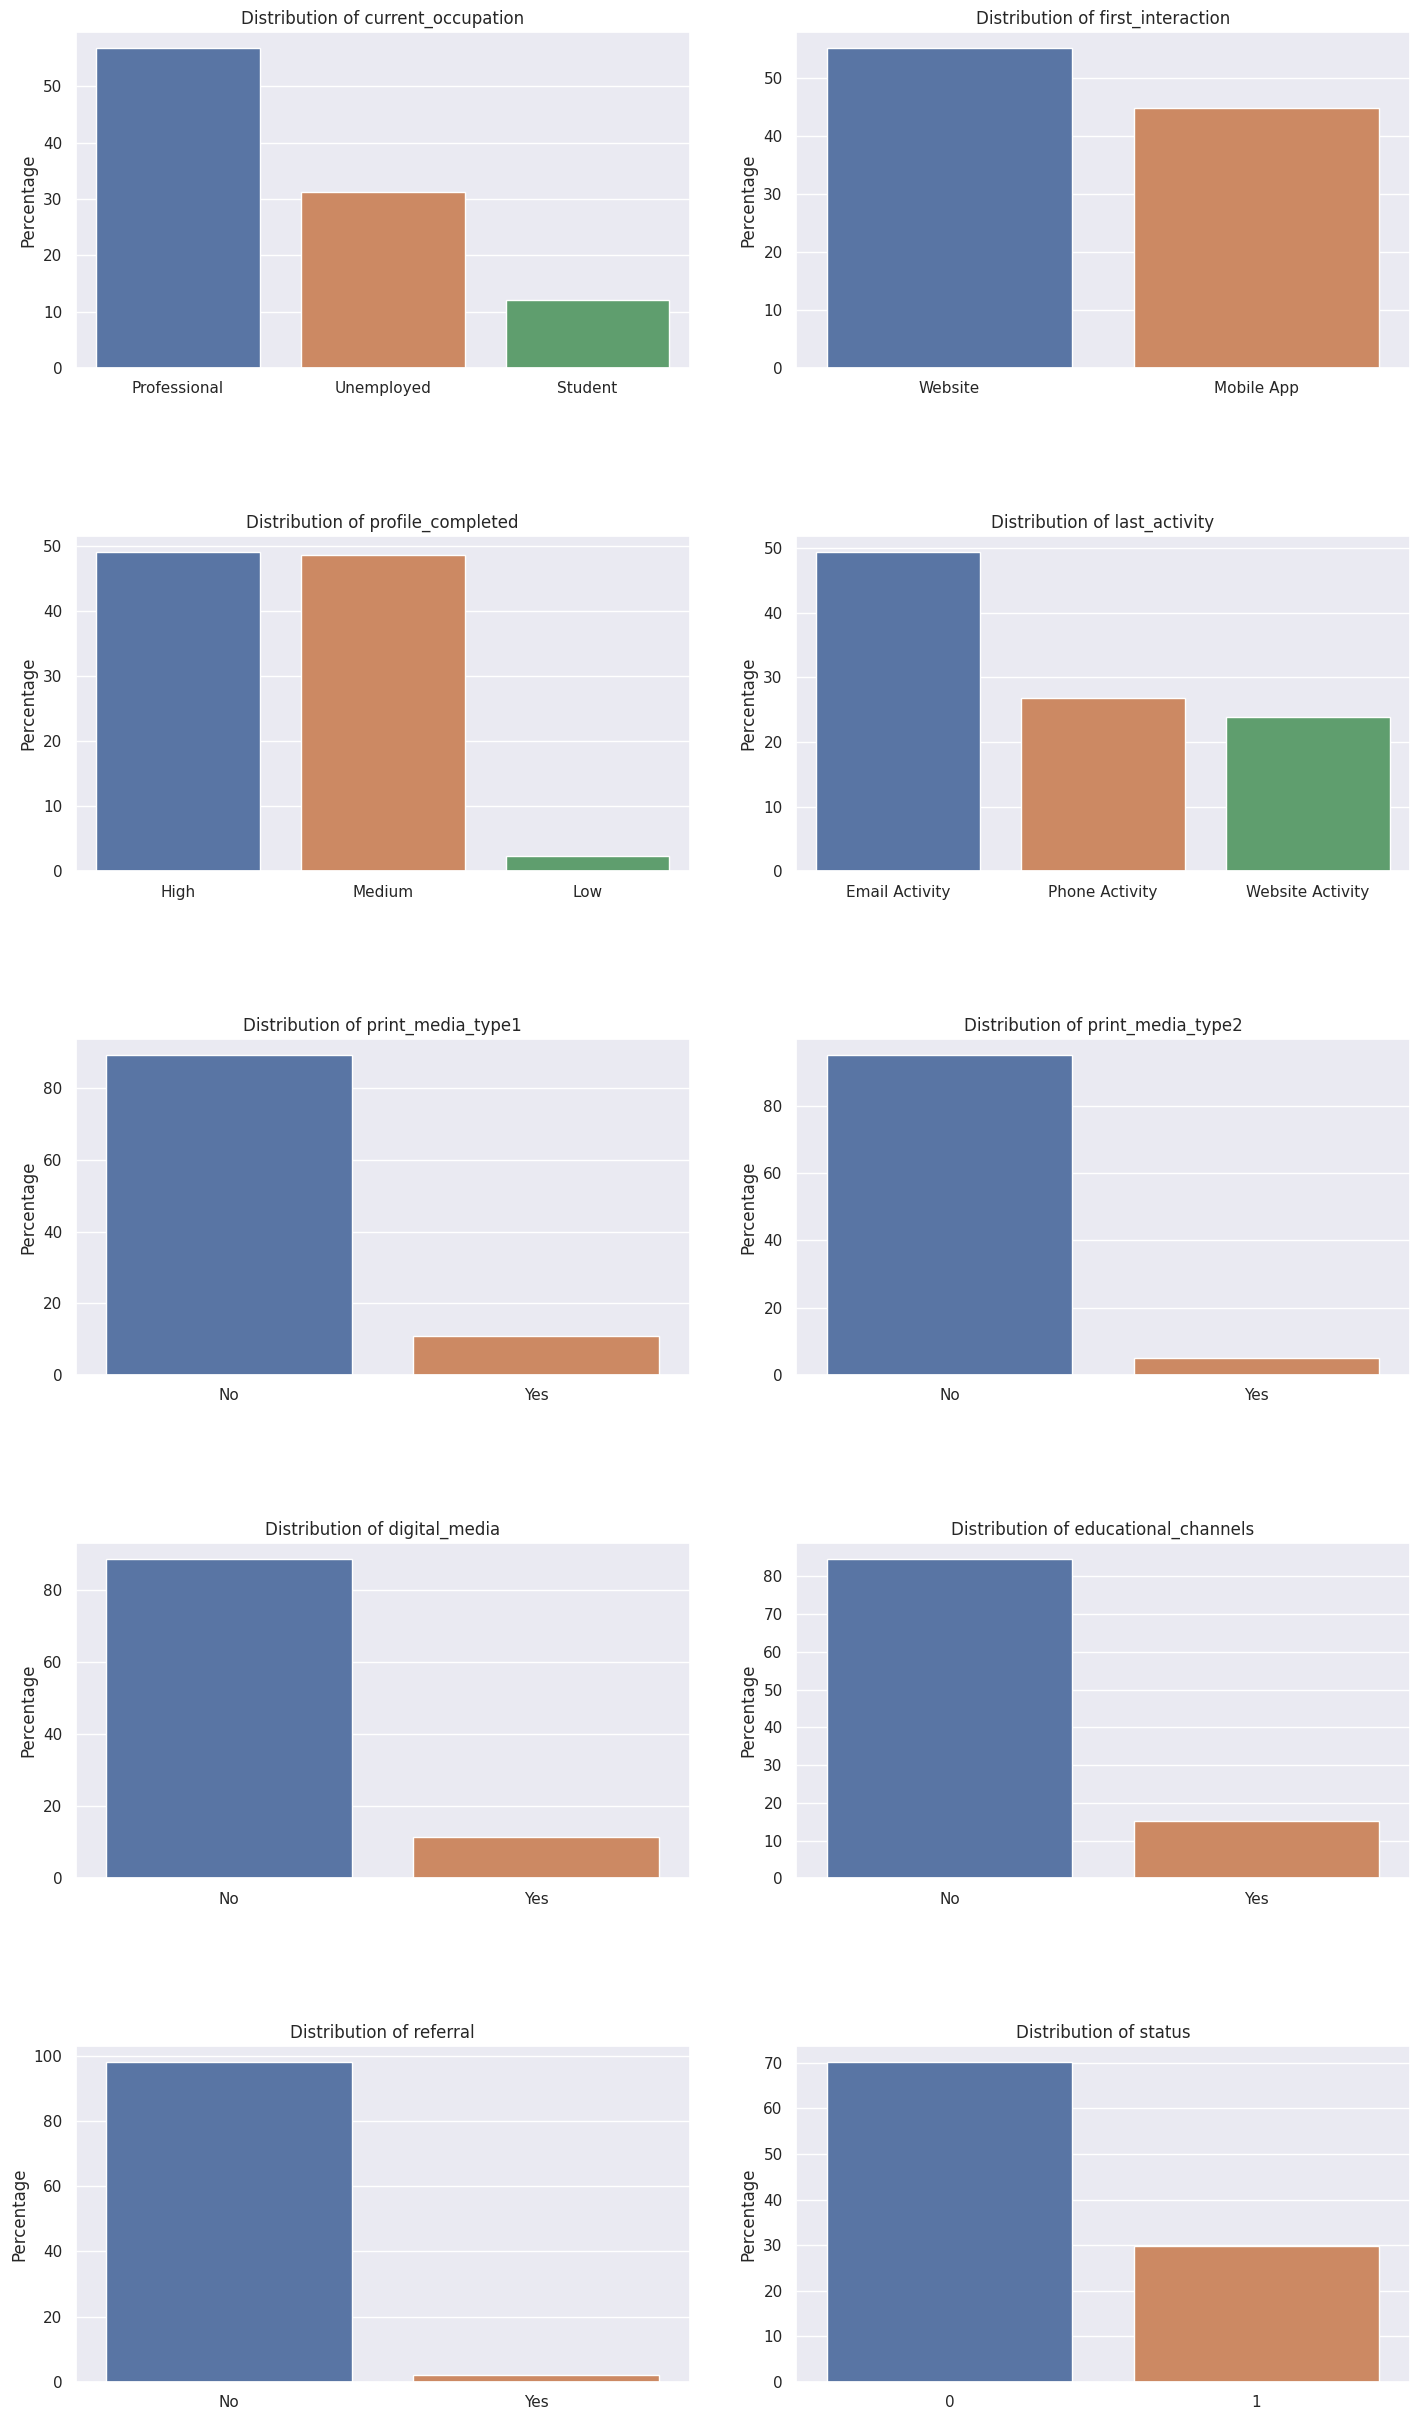

In [ ]:
# Viewing the distribution of my categorical variables visually

# Set the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Creating bar charts for each categorical variable
for idx, col in enumerate(cat_col):
    # Calculate the percentage of each category
    percentage = data[col].value_counts(normalize=True) * 100

    # Plot in the respective subplot
    sns.barplot(x=percentage.index, y=percentage.values, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.5)  # Adjust the horizontal space between rows
plt.show()

* About 30% of these leads have converted, which is an excellent proportion and should make overall analysis easier.
* A number of these variables have the vast majority of observations within a single category, and thus hold very little information.  I will make a list of these and consider removing them in my analysis as so few of them apply, though I will compare some of them to the target variable of "status" in my multivariate analysis before I do that finally.  These are:
    * Referrals, with only 2% of observations having been referred
    * Profile_completed[Low], with only 2.8% of observations here and all the rest being High or Medium
    * Print Media Type 2, with only about 5% of leads having been exposed to it
Some other variables are also relatively unevenly distributed, having only 10 to 15% of leads in one category, but this is not so small to exclude.  

Let's move on to our multivariate analysis.

## Multivariate Analysis

Let's first examine the categorical variables that we are considering removing for their uneven distributions by looking at how they relate to the target variable of lead conversion, i.e. "status".

In [ ]:
# Defining the stacked_barplot() function so that I don't have to do it separately for each comparison
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

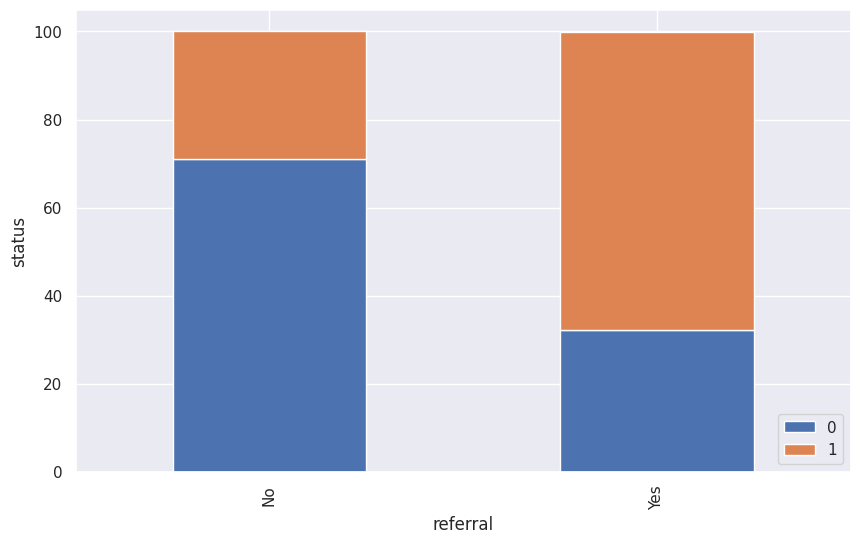

In [ ]:
# Comparing whether a lead has been referred is correlated with conversion rate
stacked_barplot(data, "referral", "status")

Whether or not someone was referred is clearly correlated with whether or not the lead converted, so despite referrals only representing 2% of leads, I will keep this variable.

Now what about Profile Completed:

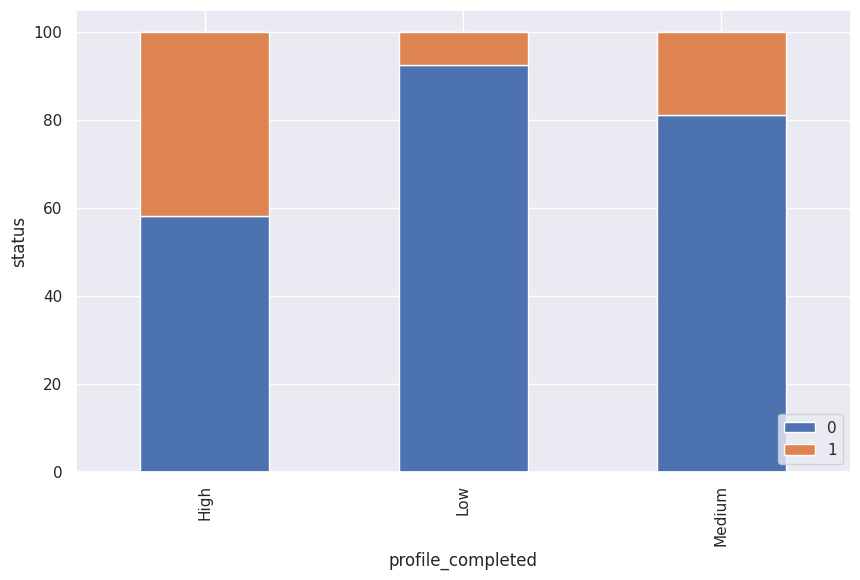

In [ ]:
# Comparing whether profile completion affects conversion rate
stacked_barplot(data, "profile_completed", "status")

This variable is also highly correlated with conversion rate, so we'll keep this one as well despite fewer than 3% of leads being in the "Low" category.

Let's now compare the rest of the categorical variables in this manner:

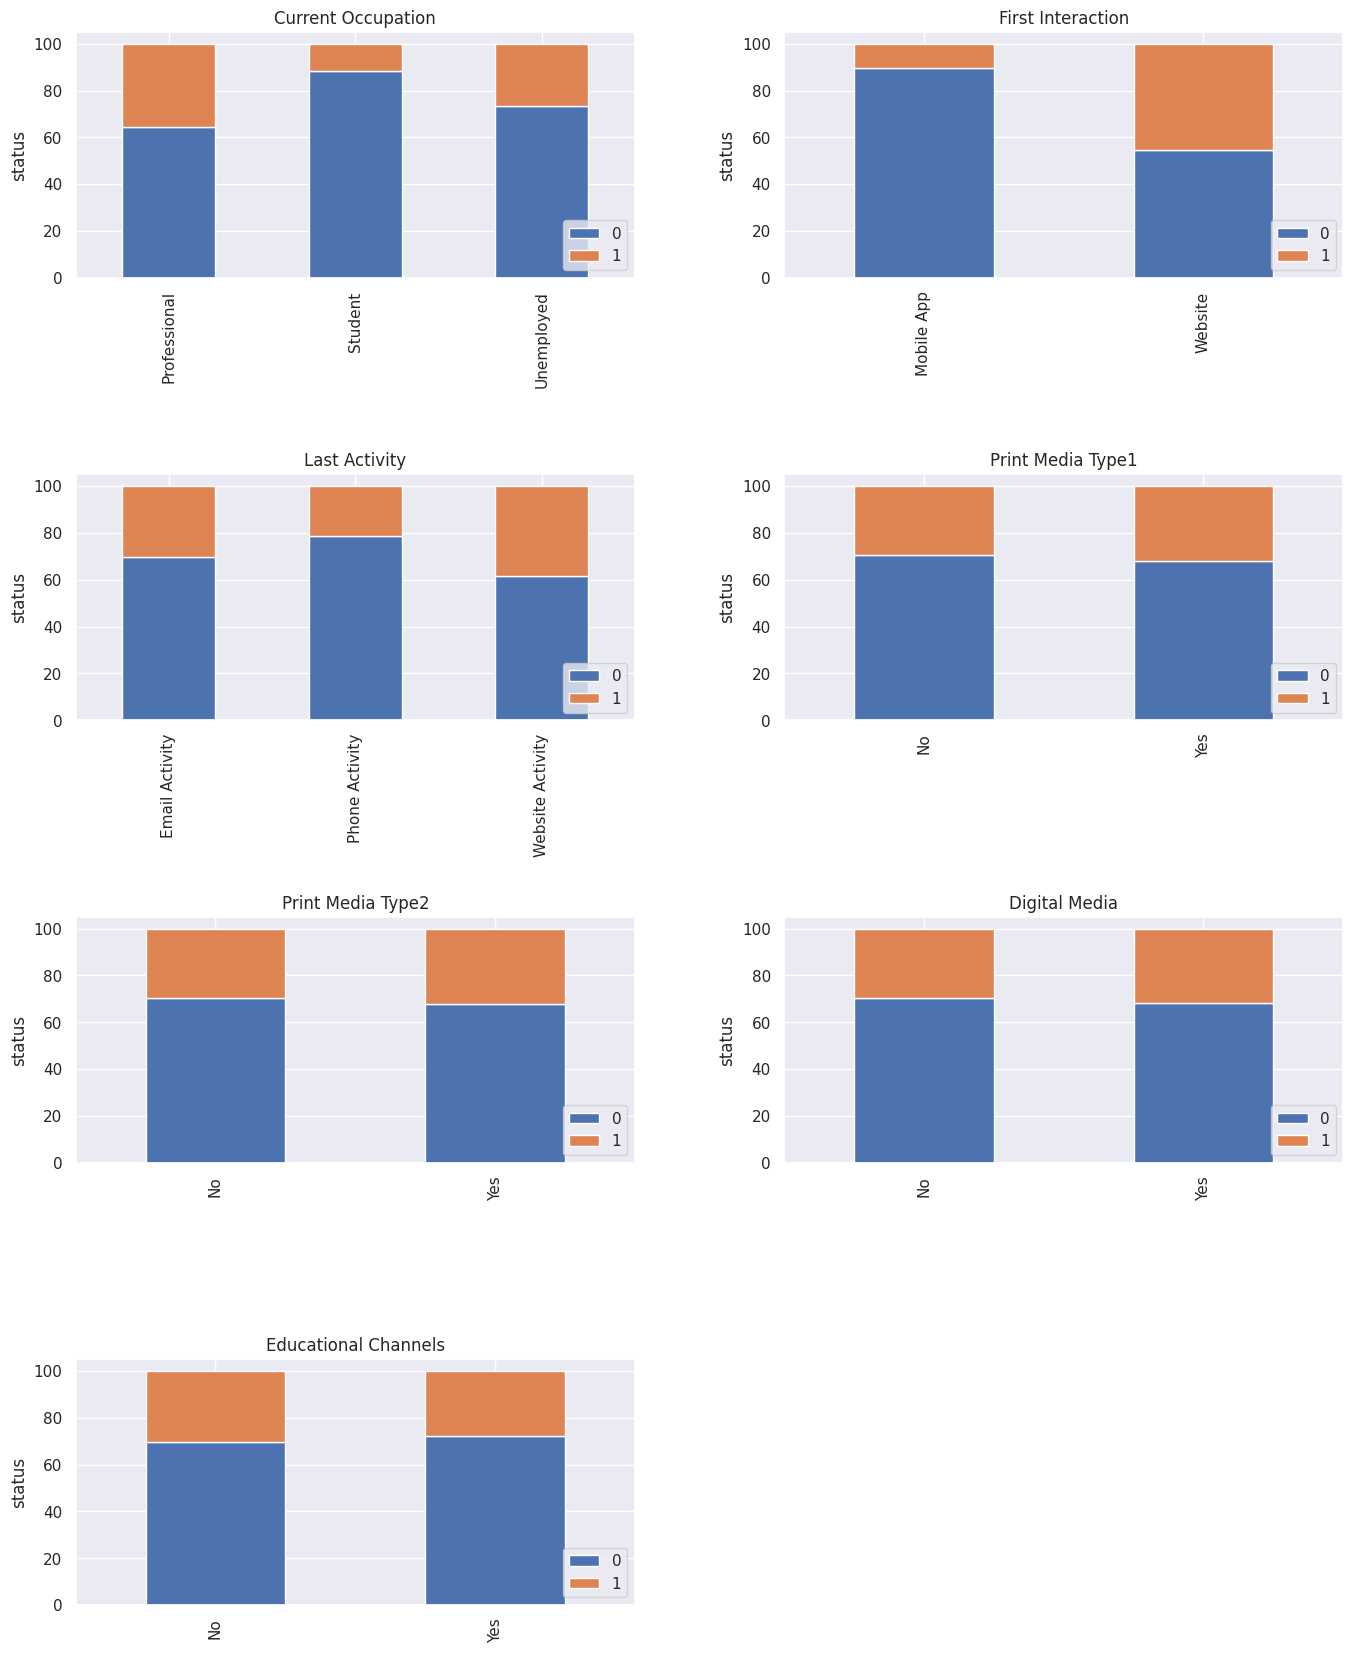

In [ ]:
# Modifying my stacked barplot function so I can put them all together
def stacked_barplot(data, predictor, target, ax):
    crosstab = pd.crosstab(data[predictor], data[target], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.legend(loc="lower right")
    ax.set_ylabel(target)
    ax.set_title(predictor)
    ax.set_xlabel('')

    # Format and set title
    formatted_title = ' '.join(word.capitalize() for word in predictor.split('_'))
    ax.set_title(formatted_title)

# List of predictor columns
pred_col = ["current_occupation", "first_interaction",
            "last_activity", "print_media_type1", "print_media_type2",
            "digital_media", "educational_channels"]

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Creating stacked bar charts for each variable
for idx, col in enumerate(pred_col):
    stacked_barplot(data, col, "status", axes[idx])

# Hide the last subplot (unused)
axes[-1].axis('off')

# Adjust layout
plt.tight_layout(pad=5.0)
plt.subplots_adjust(hspace=0.8)
plt.show()

Current occupation definitely seems to have an effect on lead conversion, with current professionals being the most likely to become customers and students being least likely, which makes sense given that ExtraaLearn targets upskilling/reskilling (more likely to be sought after by existing professionals), and students are already pursuing education through other means.  

Leads are also far more likely to convert if they were first exposed to ExtraaLearn through the website rather than the mobile app, which might indicate that people searching on the computer are more serious leads while those using the mobile app are more casual, or it might indicate that the mobile app experience is not effective at converting leads to customers.  This deserves more investigation by the marketing team.

This trend is supported by the observation that those whose last activity was on the website were twice as likely to convert as those whose last activity was via phone, with those interacting via email being somewhere in the middle.

Interestingly, whether or not leads indicated that they had seen either of the two print media ads, the digital media ad, or whether they had learned about Extraalearn through their educational channels, doesn't seem to have any affect whatsoever on whether the leads were converted as the distribution of converted and unconverted leads is nearly identical in both the exposed and unexposed conditions.  

Accordingly, I will remove "educational_channels", "digital_media", "print_media_type1", and "print_media_type2" as variables under consideration.  

*Also, the marketing team will want to note that, while this analysis cannot determine whether these advertising channels generate leads or not, it does suggest that these channels don't help convert leads into customers.*

**Removing "educational_channels", "digital_media", "print_media_type1", and "print_media_type2" as variables under consideration.**

In [7]:
# Making a copy of the DataFrame
data_copy = data.copy()

# Dropping the specified columns
data.drop(columns=["educational_channels", "digital_media", "print_media_type1", "print_media_type2"], inplace=True)


**Let's now examine how the numeric variables correlate with lead conversion status**

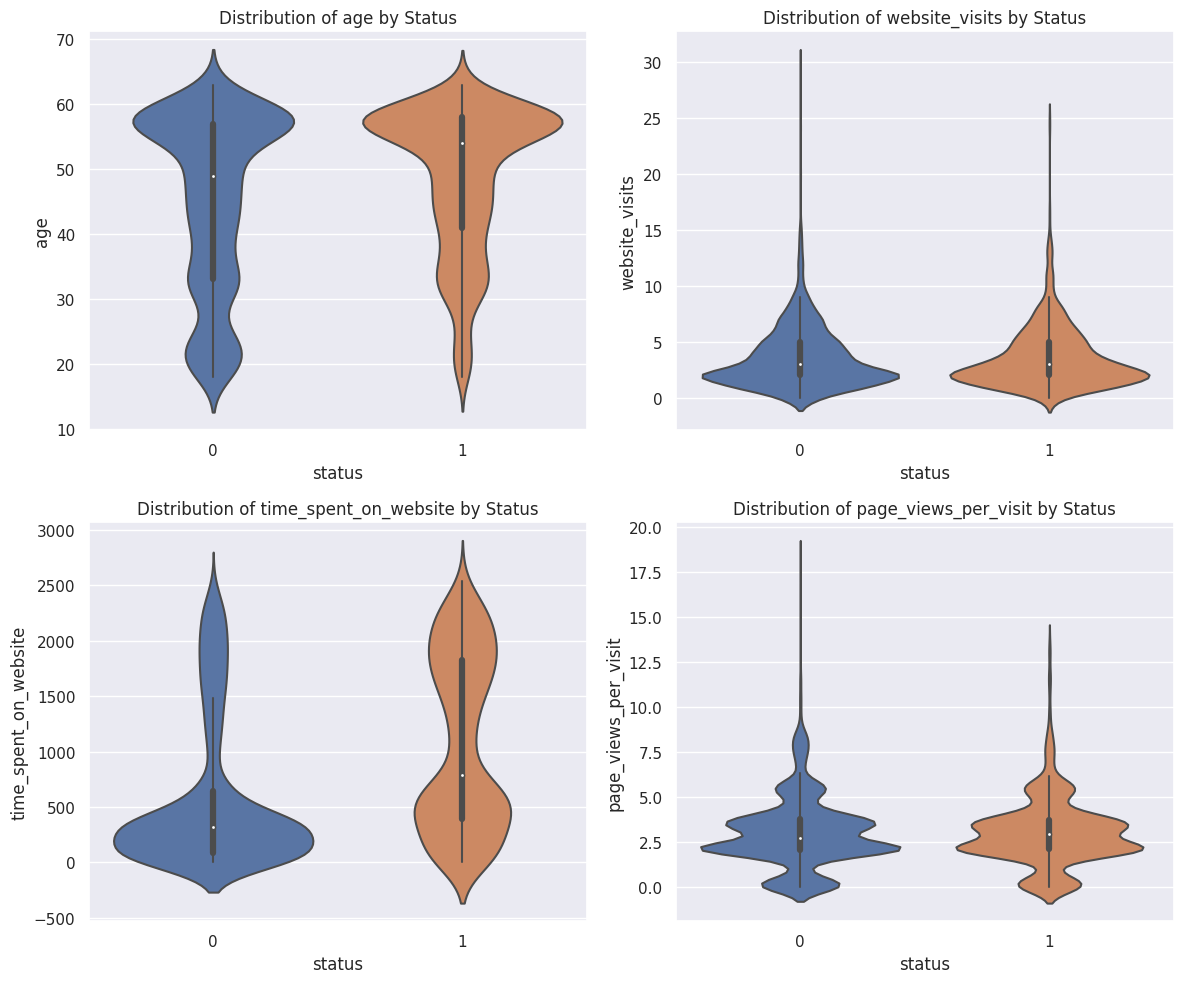

In [ ]:
# Comparing my numeric variables to my lead conversion status using violin plots

numeric_columns = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Creating violin plots for each numeric variable
for idx, col in enumerate(numeric_columns):
    sns.violinplot(x='status', y=col, data=data, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Status')

# Adjust layout
plt.tight_layout()
plt.show()

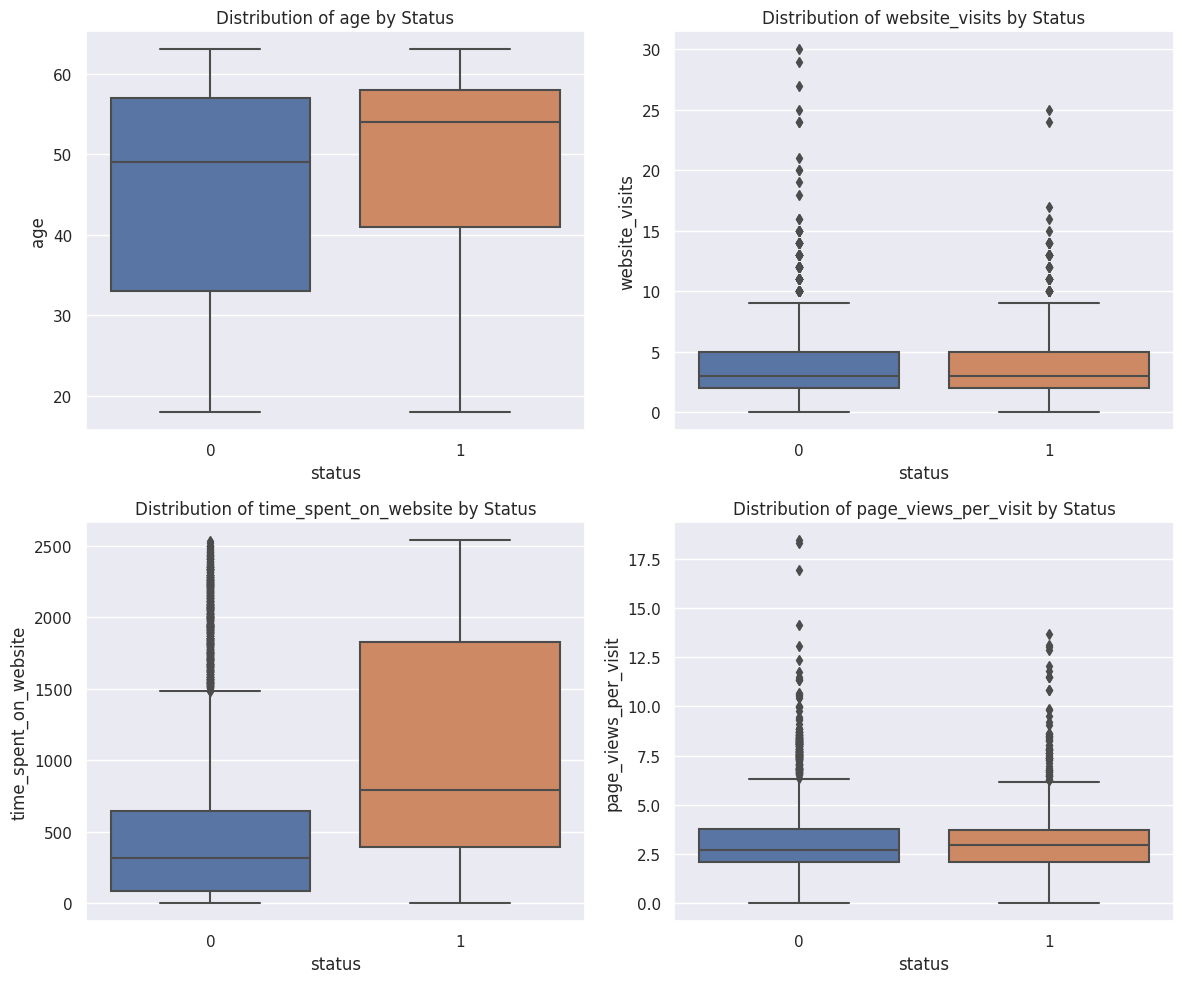

In [ ]:
# Examing the same with box plots

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Creating box plots for each numeric variable
for idx, col in enumerate(numeric_columns):
    sns.boxplot(x='status', y=col, data=data, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Status')

# Adjust layout
plt.tight_layout()
plt.show()

Age appears to be significantly correlated with lead conversion status, with those becoming customers tending to be older, with those converting having a median age of 55 and a first quartile age of 42, compared to 48 and 34 for those not converting.

Time spent on website appears to be very highly correlated with lead conversion, with the IQR of those becoming customers being 480-1800 compared to 50-600 for those who don't become customers.  Those who become customers are much more likely to have spent significant time on the website.

Interestingly, while time spent on website is highly correlated with conversion, the number of website visits and the number of webpages per visit appear to have no correlation whatsoever to lead conversion, so I will remove those as variables under consideration.

In [8]:
# Dropping number of website visits and average pages visited
data.drop(columns=["page_views_per_visit", "website_visits"], inplace=True)

In [ ]:
# Examining data again to ensure it's in good shape
data.head()

,age,current_occupation,first_interaction,profile_completed,time_spent_on_website,last_activity,referral,status
0,57,Unemployed,Website,High,1639,Website Activity,No,1
1,56,Professional,Mobile App,Medium,83,Website Activity,No,0
2,52,Professional,Website,Medium,330,Website Activity,No,0
3,53,Unemployed,Website,High,464,Website Activity,No,1
4,23,Student,Website,High,600,Email Activity,No,0


**Now that we've compared our variables to lead conversion status, I'd like to take a quick look at how the remaining variables are distributed based on each other using contingency tables.**

In [ ]:
# Convert numeric columns to categorical by binning
data['binned_age'] = pd.cut(data['age'], bins=[18, 25, 30, 39, 49, 59, 70], labels=['18-25', '26-30', '30s', '40s', '50s', '60s'])
data['binned_time_spent'] = pd.cut(data['time_spent_on_website'], bins=6)

# List of variables under consideration (including binned versions of numeric variables)
variables = ["binned_age", "current_occupation", "first_interaction", "profile_completed", "binned_time_spent", "last_activity", "referral"]

# Bin the numeric variables
data['binned_age'] = pd.cut(data['age'], bins=[18, 25, 30, 39, 49, 59, 70], labels=['18-25', '26-30', '30s', '40s', '50s', '60s'])
data['binned_time_spent'] = pd.cut(data['time_spent_on_website'], bins=6)

# List of variables under consideration
variables = ["binned_age", "current_occupation", "first_interaction", "profile_completed", "binned_time_spent", "last_activity", "referral"]

# Creating crosstabs for each pair of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        crosstab = pd.crosstab(data[var1], data[var2], normalize='index') * 100  # Normalize and convert to percentage
        crosstab_rounded = crosstab.round(1)  # Round to one decimal point

        print(f"Crosstab of {var1} and {var2}:\n")
        print(crosstab_rounded)
        print("-" * 50)


Crosstab of binned_age and current_occupation:

current_occupation  Professional  Student  Unemployed
binned_age                                           
18-25                        3.2     96.8         0.0
26-30                      100.0      0.0         0.0
30s                         56.1      0.0        43.9
40s                         64.4      0.0        35.6
50s                         69.7      0.0        30.3
60s                         36.4      0.0        63.6
--------------------------------------------------
Crosstab of binned_age and first_interaction:

first_interaction  Mobile App  Website
binned_age                            
18-25                    44.6     55.4
26-30                    44.9     55.1
30s                      44.0     56.0
40s                      47.3     52.7
50s                      44.8     55.2
60s                      42.9     57.1
--------------------------------------------------
Crosstab of binned_age and profile_completed:

profile_comp

This takes some examination to parse, but I have identified these variables as having the most significant correlations:
\
    *Age and Current Occupation\
    *Profile Completed and Time Spent\
    *Current Occupation and Referral\
    *Profile Completed and Referral\
    *Last Activity and Referral\
    *Time Spent and Referral

Let's see if we can explore this statistically (using Chi-squared) to corroborate or reject my ideas of the most significant correlations.


**Using Chi-squared to examine contingencies statistically**

In [ ]:
# Using Chi-squared to examine contingencies statistically

from scipy.stats import chi2_contingency

# List of variables under consideration
variables = ["binned_age", "current_occupation", "first_interaction", "profile_completed", "binned_time_spent", "last_activity", "referral"]

# Dictionary to hold the Chi-squared results
chi_squared_results = {}

# Calculate Chi-squared statistic for each pair of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        crosstab = pd.crosstab(data[var1], data[var2])
        chi2, p, dof, expected = chi2_contingency(crosstab)
        chi_squared_results[f'{var1} vs {var2}'] = chi2

# Sort results by Chi-squared statistic in descending order
sorted_chi_squared = sorted(chi_squared_results.items(), key=lambda x: x[1], reverse=True)

# Display the sorted results
print("Chi-squared Statistics, Sorted from Largest to Smallest:")
for pair, chi2 in sorted_chi_squared:
    print(f"{pair}: {chi2:.1f}")


Chi-squared Statistics, Sorted from Largest to Smallest:
binned_age vs current_occupation: 4662.1
profile_completed vs binned_time_spent: 40.5
binned_age vs binned_time_spent: 34.9
binned_time_spent vs referral: 24.8
binned_age vs profile_completed: 15.2
binned_time_spent vs last_activity: 14.7
current_occupation vs binned_time_spent: 9.4
profile_completed vs referral: 6.9
binned_age vs last_activity: 6.0
current_occupation vs referral: 3.3
profile_completed vs last_activity: 3.2
last_activity vs referral: 2.8
binned_age vs first_interaction: 2.7
current_occupation vs last_activity: 2.4
first_interaction vs referral: 2.3
binned_age vs referral: 1.9
current_occupation vs first_interaction: 1.6
first_interaction vs binned_time_spent: 1.2
current_occupation vs profile_completed: 1.0
first_interaction vs profile_completed: 0.7
first_interaction vs last_activity: 0.1


This partially corroborates my previous analysis using the cross-tab and visual comparison.

By far the most statistically significant contingency is Age vs Current Occupation.  Nearly all Students are in the 18-25 age range in our sample, and Students were the least likely Current Occupation to convert to customers, which makes sense given that they are already pursuing education through other means.

Overall, it looks like we're seeing a picture of leads being more likely to convert if they:
* Have been referred
* Have completed more of their profile
* Have spent more time on the website
* Are not students
* If their first exposure was via the website
* If their last activity was on the website

There is a lot more we could explore here, but let's proceed to our Decision Tree model.

# Modeling

### Data Preprocessing

After examining the data, I have removed ID, website_visits, page_views_per_visit, print_media_type1, print_media_type2, digital_media, and educational_channels as variables, the first because it is a unique ID and the others because they appeared to have no effect whatsoever on the target variable of lead conversion status.  Let's review what other changes are needed:

Checklist:
- Missing value treatment
  * There were no missing values
- Outlier detection and treatment
  * The only outliers were in website_visits and page_views_per_visit, which have been removed as variables under consideration
- Feature engineering
  * I will need to use one-hot encoding/dummy variables for my categorical variables
  * My only numeric variables are age and time_spent_on_website and at this point I am not planning to use an ensemble model, so I won't do any scaling unless further examination suggests that I should.
- Preparing data for modeling
  * I will separate my data into the target variable (status) and predictor variables (everything else)
  * I will separate my data into training and testing splits, stratifying on status
  * I will examine the distribution of the referral variable in my train/test splits to ensure it gets roughly equal representation, as it is very unevenly distributed (2% of observations are "1") but appears to be highly correlated with conversion status.

In [9]:
#Examining dataset again to ensure everything looks right
data.head()

,age,current_occupation,first_interaction,profile_completed,time_spent_on_website,last_activity,referral,status
0,57,Unemployed,Website,High,1639,Website Activity,No,1
1,56,Professional,Mobile App,Medium,83,Website Activity,No,0
2,52,Professional,Website,Medium,330,Website Activity,No,0
3,53,Unemployed,Website,High,464,Website Activity,No,1
4,23,Student,Website,High,600,Email Activity,No,0


In [20]:
# Separating out my target and predictor variables
X = data.drop('status', axis=1)  # Features
y = data['status']  # Target variable

# Creating my train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y,)

# Analyzing the split of the "referral" variable
# Normalized Proportion of 'referral' in Training Data
referral_train_proportions = X_train['referral'].value_counts(normalize=True)
print("Percentage of 'referral' in Training Data:")
for category, proportion in referral_train_proportions.items():
    print(f"{category}: {proportion:.1%}")

# Normalized Proportion of 'referral' in Testing Data
referral_test_proportions = X_test['referral'].value_counts(normalize=True)
print("Percentage of 'referral' in Testing Data:")
for category, proportion in referral_test_proportions.items():
    print(f"{category}: {proportion:.1%}")

Percentage of 'referral' in Training Data:
No: 98.1%
Yes: 1.9%
Percentage of 'referral' in Testing Data:
No: 97.7%
Yes: 2.3%


I'd say that split is close enough to be getting on with.

In [21]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
time_spent_on_website    0
last_activity            0
referral                 0
dtype: int64
------------------------------
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
time_spent_on_website    0
last_activity            0
referral                 0
dtype: int64


In [24]:
# Reviewing data types
print(data.dtypes)

age                       int64
current_occupation       object
first_interaction        object
profile_completed        object
time_spent_on_website     int64
last_activity            object
referral                 object
status                    int64
dtype: object


In [26]:
# Converting categorical variables to dummy variables

# List of columns to convert
col_dummy=['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'referral']

#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

In [28]:
# Checking dataset after dummy variables
X_train.head()

,age,time_spent_on_website,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,referral_Yes
389,57,582,0,0,0,0,0,0,0,0
1162,35,1937,0,1,1,0,1,0,0,0
1057,53,1554,0,1,1,0,1,0,0,0
436,52,15,0,0,1,0,0,0,0,0
946,57,0,0,0,1,0,0,0,0,0


### Model evaluation criteria

I'm assuming that the cost of pursuing leads is relatively low given that they are mostly interacting with the website, phone app, and other existing architecture, and thus that ExtraaLearn would like to err on the side of maximizing the total number of leads converted, and thus want to minimize false negatives and prioritize the Recall of the model.

Also, a high priority should be given to model interpretability and understanding lead conversion drivers, as we want to build a profile of those likely to convert and clearly understand what leads to conversion.

**Prioritize Recall and Interpretability**



**Let's create a function to calculate and print the classification report and confusion matrix.**

In [22]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [29]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking the performance of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



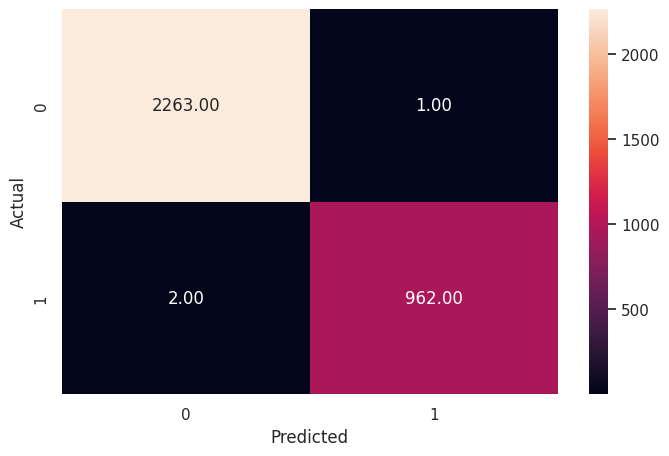

In [30]:
 # Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

Almost perfect performance on the training set suggests that every data point has been classified and thus that there is likely to be significant overfitting.  Let's examine on the test data.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       971
           1       0.67      0.66      0.66       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



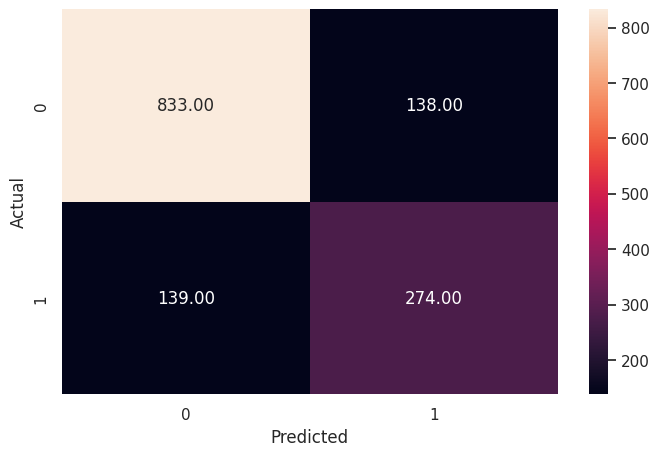

In [31]:
# Model performance on test data
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

Model performance on the test set has fallen dramatically, indicating significant overfitting, though overall accuracy is still 80% and Recall on predicting a successful conversion is 66%.  That's not terrible, but let's see if we can improve that through a grid search to determine if we need to prune or make other changes.

### Hyperparameter tuning using grid search

In [32]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=50, min_samples_split=30,
                       random_state=1)

Our Grid Search suggests that the best version of our model has a max depth of 11, max leaf nodes of 50, and a minimum sample split of 30.  Let's see how this tuned model performs.

## Tuned Decision Tree Model

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2264
           1       0.82      0.79      0.81       964

    accuracy                           0.89      3228
   macro avg       0.87      0.86      0.86      3228
weighted avg       0.89      0.89      0.89      3228



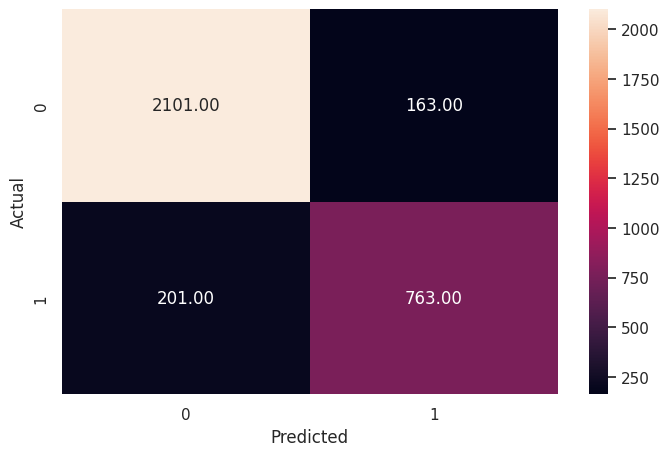

In [33]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

This is a significant improvement on the untuned model's performance on the test data, and looks to be effective without overfitting.  Let's check its performance on the test data.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.77      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



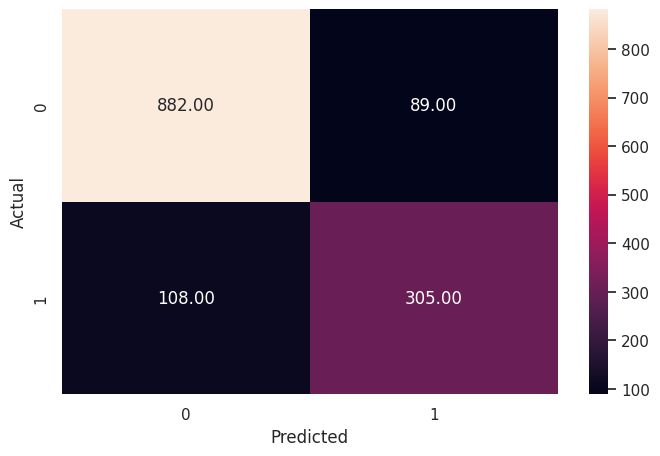

In [34]:
# Checking performance on the test dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Tuning has increased our overall accuracy from 80% to 86% and Recall on lead conversion from 66% to 74%.  This is not bad.  Before we build a Random Forest model, let's take a look at the tree and see what features it has identified as most important.

### Visualizing our Decision Tree

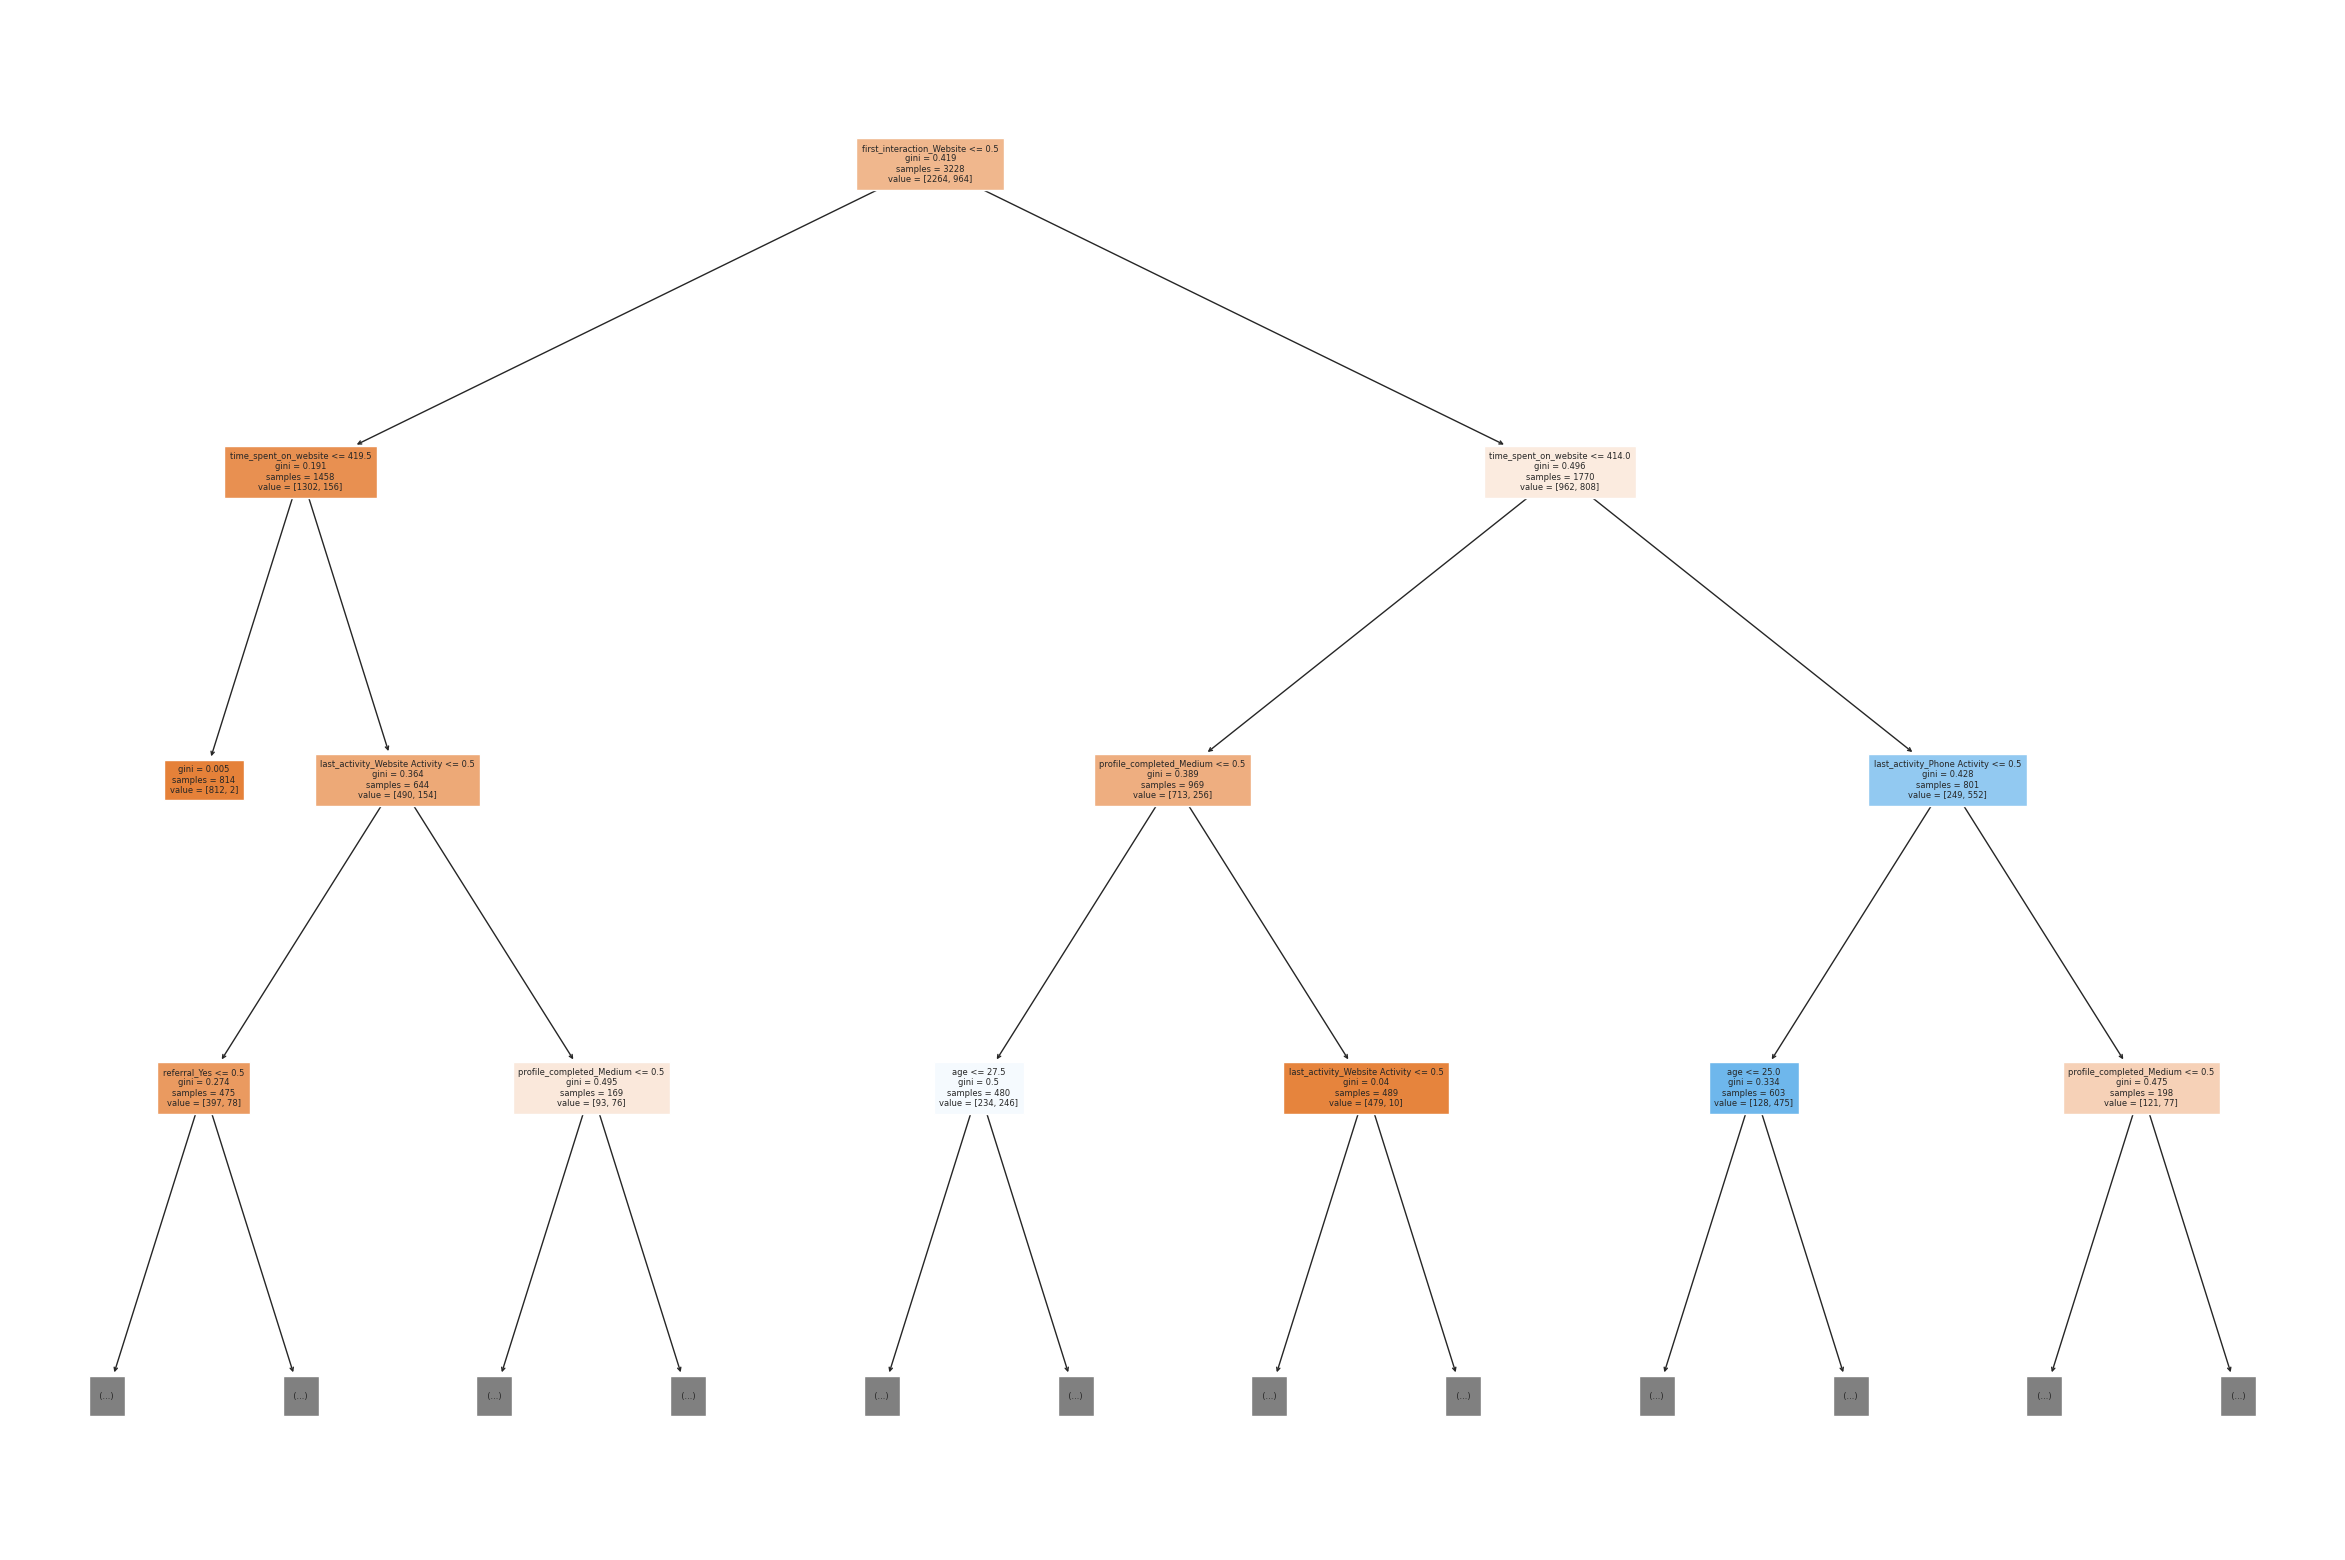

In [74]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plotting decision tree
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 20))  # Adjust figure size
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=6,  # Adjust font size
    max_depth=3,  # Limit the depth of the tree
)

plt.show()


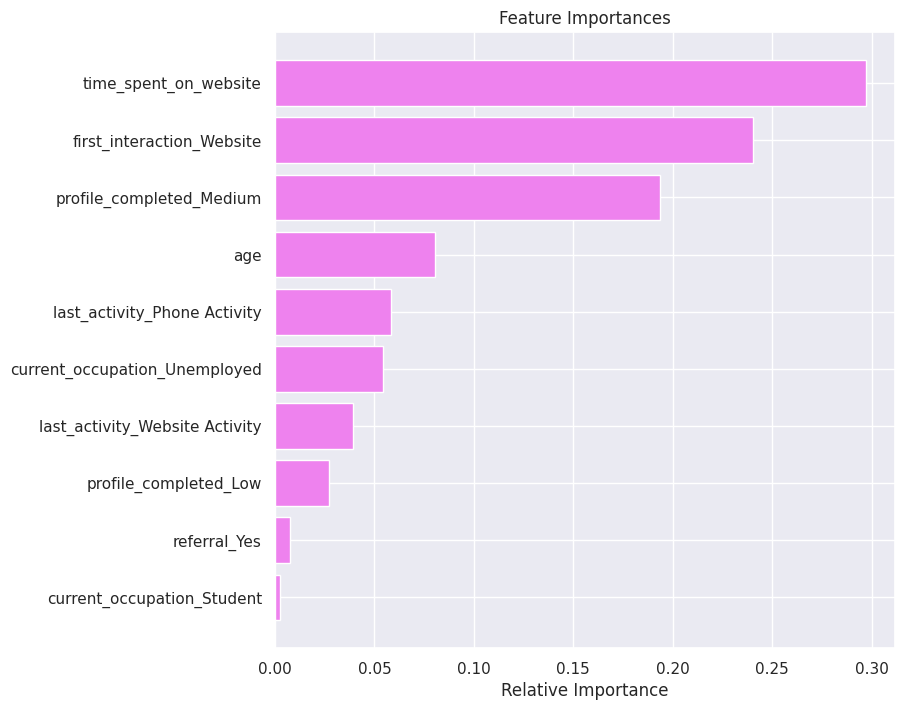

In [36]:
# Importance of features in the tuned decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This corroborates some of our previous analysis, indicating that Time Spent on Website, whether the first interaction was via the website, and whether the profile was completed to "medium" as being especially significant factors, while age, the last activity being via phone, and current occupation being unemployed as being in the next tier of importance.

Interestingly, our previous analysis suggested that a current occupation of student was particularly important, which is not corroborated in this model.  It also suggested that a referral was very important for lead conversion, but given that only 2% of the participants in the dataset had a referral, I'm not surprised it's of low significance overall.

Let's see what we get with a Random Forest model:

## Building a Random Forest model

In [45]:
# Building a Random Forest model

rf_estimator_untuned = RandomForestClassifier(random_state=1)
rf_estimator_untuned.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

### Checking the performance of the model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



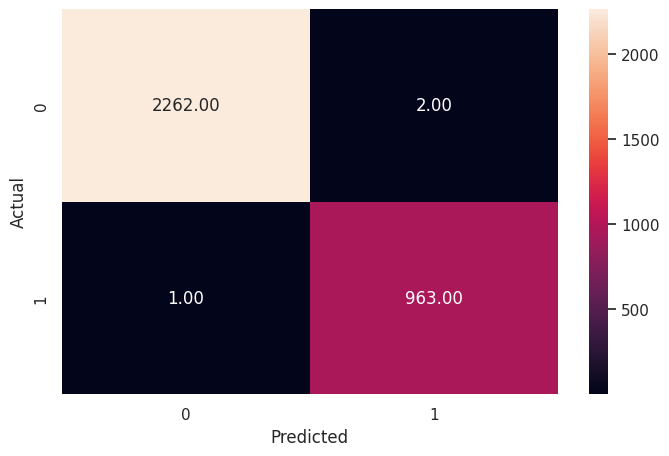

In [46]:
# Evaluating performance on the training data
y_pred_train_rf = rf_estimator_untuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

Once again we have near-perfect performance, which suggests overfitting.  Let's look at the test data.

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       971
           1       0.74      0.70      0.72       413

    accuracy                           0.84      1384
   macro avg       0.81      0.80      0.80      1384
weighted avg       0.83      0.84      0.83      1384



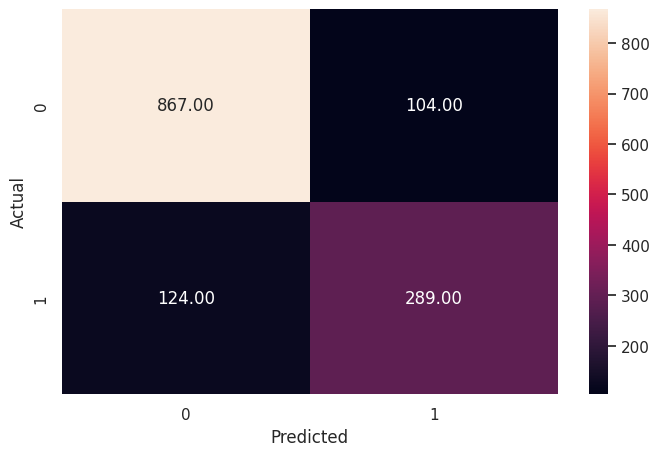

In [60]:
# Evaluating model performance on test data
y_pred_test_rf = rf_estimator_untuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

We have an overall accuracy of 84% with a Recall on lead conversion of 70% and pretty balanced precision and recall.  Obviously, its performance has fallen significantly compared to the training data, suggesting substantial overfitting, so let's work on fine-tuning the model to see if we can boost performance.   

### Finetuned Random Forest Model

In [40]:
# Finetuning the Random Forest model with Grid Search

rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [2, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['auto', 'sqrt']
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, cv=5, scoring='recall', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_estimator to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_split=5,
                       n_estimators=300, random_state=1)

### Checking the performance of the model

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2264
           1       0.85      0.84      0.85       964

    accuracy                           0.91      3228
   macro avg       0.89      0.89      0.89      3228
weighted avg       0.91      0.91      0.91      3228



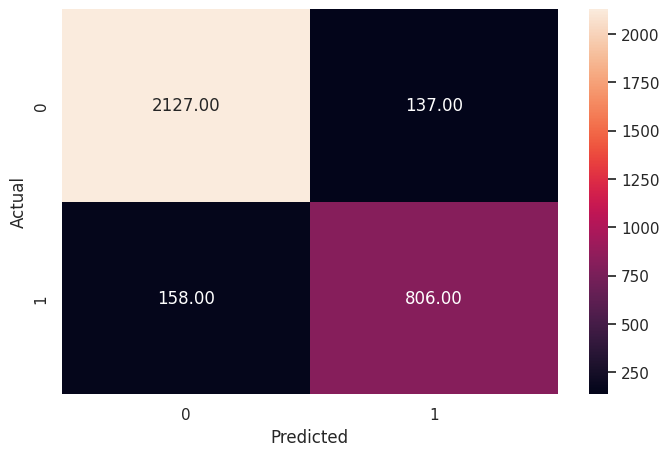

In [41]:
# Checking performance on the training dataset
rf_tuned = rf_estimator.predict(X_train)
metrics_score(y_train,rf_tuned)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.79      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



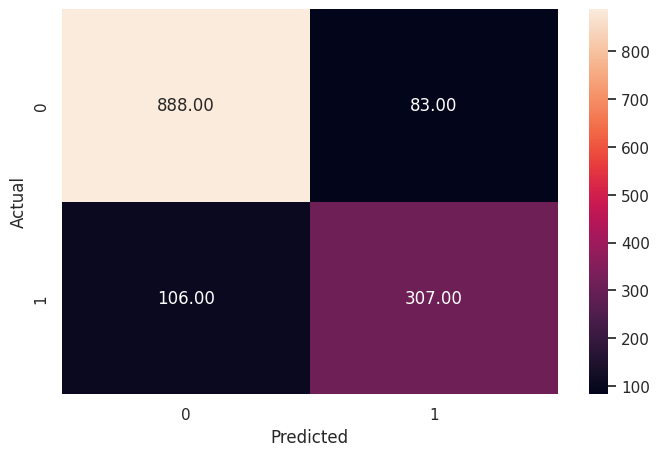

In [42]:
# Checking performance on the test dataset
y_pred_tuned = rf_estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Despite the wide range of parameters explored for the Random Forest model, there still appears to be significant overfitting to the training data, as overall accuracy fell from 91% to 86% and Recall of lead conversion fell from 84% to 74% when comparing performance on training vs test data.  Still, this is a marginal improvement over the performance of the tuned Decision Tree model on the test data, which obtained an overall accuracy of 84% and Recall of lead conversion of 70%, which shows this to be our best model so far. We'll take a closer look at this when we compare models directly.

Let's examine the feature importance found by this model.



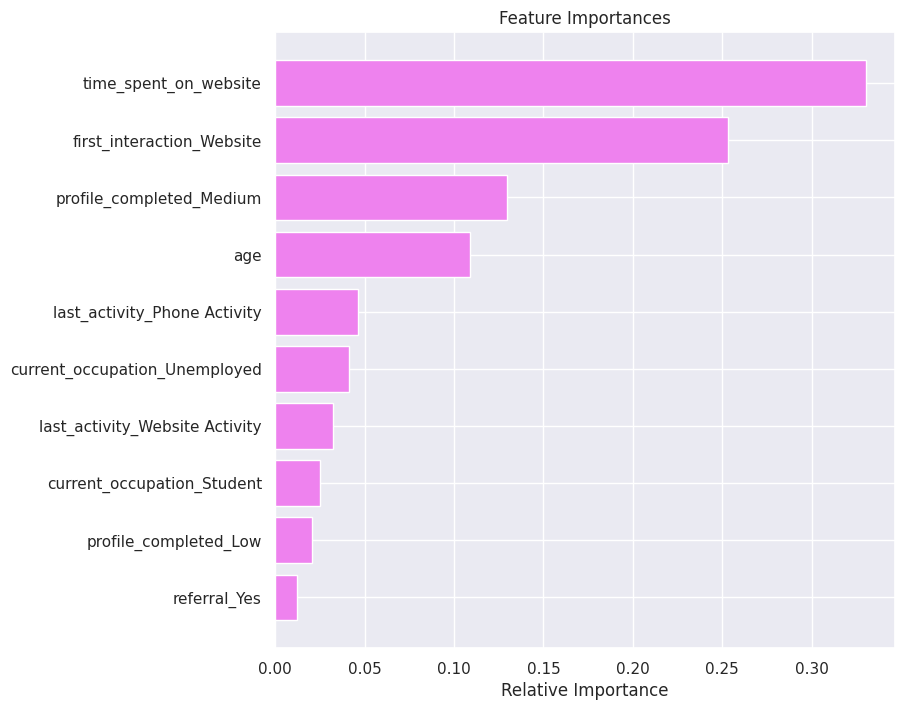

In [44]:
# Importance of features in the tuned Random Forest model
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The tuned Random Forest Model has discovered nearly identical relative importances to that of the Decision Tree.

## Comparing Models

In [63]:
def metrics_score_basic(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, average='macro')  # Changed to 'macro'
    recall = recall_score(actual, predicted, average='macro')  # Changed to 'macro'
    f1 = f1_score(actual, predicted, average='macro')  # Changed to 'macro'
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [64]:
# Get predictions for each model
pred_test_dt = model_dt.predict(X_test)
y_pred_tuned_dt = estimator.predict(X_test)
y_pred_test_rf = rf_estimator_untuned.predict(X_test)
y_pred_tuned_rf = rf_estimator.predict(X_test)

# Calculate metrics for each model
dt_metrics = metrics_score_basic(y_test, pred_test_dt)
tuned_dt_metrics = metrics_score_basic(y_test, y_pred_tuned_dt)
rf_metrics = metrics_score_basic(y_test, y_pred_test_rf)
tuned_rf_metrics = metrics_score_basic(y_test, y_pred_tuned_rf)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame([dt_metrics, tuned_dt_metrics, rf_metrics, tuned_rf_metrics],
                             index=['Untuned Decision Tree', 'Tuned Decision Tree', 'Untuned Random Forest', 'Tuned Random Forest'])
# Round the DataFrame to two decimal places
comparison_df_rounded = comparison_df.round(3)

# Print the rounded DataFrame
print(comparison_df_rounded)


                       Accuracy  Precision  Recall  F1 Score
Untuned Decision Tree     0.800      0.761   0.761     0.761
Tuned Decision Tree       0.858      0.833   0.823     0.828
Untuned Random Forest     0.835      0.805   0.796     0.800
Tuned Random Forest       0.863      0.840   0.829     0.834


Overall, tuned models produce better results than untuned models and Random Forest produces better results than the basic Decision Tree, but the performance gain is low.  I'm inclined to go with the Tuned Decision Tree over the Tuned Random Forest as it is simpler and possible to visualize.  

**Best Model: Tuned Decision Tree**\
  *Overall Accuracy: 83.3%\
  *Overall Recall: 82.3%\
  *Recall on Lead Conversion prediction: 74.0%

## Actionable Insights and Recommendations

* Most marketing channels that ExtraaLearn gets leads from that were explored in this data set (digital media, both print media types, and educational channels) seemed to have no effect whatsover on the percentage of leads converting to customers.  However, **referrals have a very strong influence on lead conversions, so marketing may want to push referrals hard.**  Only 2% of the participants in this dataset were referred, but a large percentage of them converted, so increasing the number of referrals seems promising.

* Current occupation appears to have a strong influence on lead conversion, with **current professionals being the most likely to become customers and students being the least.**  This makes sense given that students are already undergoing education and are upskilling through other means already, and are not as likely to become customers of ExtraaLearn.

* Most leads in this dataset tend toward the older end, with **a large percentage of leads being in their 50s and the profile of those leads who convert to customers trending to be significantly older**, though there are conversions from all over the age range.  However, much of this may be explained by the high percentage of young people who are students, who are very unlikely to become customers.  More analysis is needed to determine if this is the case.

* Leads are also far more likely to convert if they were **first exposed to ExtraaLearn through the website rather than the mobile app**, which might indicate that people searching on the computer are more serious leads while those using the mobile app are more casual, or it might indicate that the mobile app experience is not effective at converting leads to customers.  **This deserves more investigation by the marketing team.**

* This trend is supported by the observation that **those whose last activity was on the website were twice as likely to convert as those whose last activity was via phone**, with those interacting via email being somewhere in the middle.

* Finally, **those who have spent more time on the website and who have completed more of their profile** (both of which are correlated with each other) **are more likely to convert than those who don't.**  This may because such leads are more serious about it and more likely to become customers, or because having more information about leads improves the company's ability to convert them.

**Profile of Likely Lead Converts**

Overall, it looks like we're seeing a picture of leads being more likely to convert if they:

* Have been referred
* Have completed more of their profile
* Have spent more time on the website
* Are not students
* If their first exposure was via the website
* If their last activity was on the website
